In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load DataSet 

In [96]:
df = pd.read_csv(r"student_info.csv")

In [97]:
df.head()

,study_hours,student_marks
0,6.83,78.50
1,6.56,76.74
2,NaN,78.68
3,5.67,71.82
4,8.67,84.19


In [98]:
df.shape

(200, 2)

In [99]:
df.isnull().sum()

study_hours      5
student_marks    0
dtype: int64

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   study_hours    195 non-null    float64
 1   student_marks  200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


In [101]:
df.describe()

,study_hours,student_marks
count,195.000000,200.00000
mean,6.995949,77.93375
std,1.253060,4.92570
min,5.010000,68.57000
25%,5.775000,73.38500
50%,7.120000,77.71000
75%,8.085000,82.32000
max,8.990000,86.99000


Text(0, 0.5, 'student_marks')

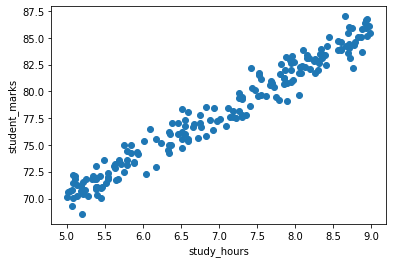

In [102]:
plt.scatter(x = df.study_hours, y = df.student_marks)
plt.xlabel('study_hours')
plt.ylabel('student_marks')

# Prepare the Data for machine Learning algorithms 

In [103]:
# Data Clearing
df.isnull().sum()

study_hours      5
student_marks    0
dtype: int64

In [104]:
df.mean()

study_hours       6.995949
student_marks    77.933750
dtype: float64

In [105]:
df2 = df.fillna(df.mean())

In [106]:
df2.isnull().sum()

study_hours      0
student_marks    0
dtype: int64

In [107]:
df2.head()

,study_hours,student_marks
0,6.830000,78.50
1,6.560000,76.74
2,6.995949,78.68
3,5.670000,71.82
4,8.670000,84.19


In [108]:
X = df2.drop('student_marks', axis=1)
y = df2.student_marks


In [109]:
print('shape of X ',X.shape)
print('shape of y ',y.shape)

shape of X  (200, 1)
shape of y  (200,)


In [110]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state = 51)

print('shape of X_train', X_train.shape)
print('shape of y_train', y_train.shape)
print('shape of X_test', X_test.shape)
print('shape of y_test', y_test.shape)

shape of X_train (160, 1)
shape of y_train (160,)
shape of X_test (40, 1)
shape of y_test (40,)


# Select a model and train it 

In [111]:
# y = m*x+c
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [112]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [113]:
lr.coef_   # M

array([3.93571802])

In [114]:
lr.intercept_   # C

50.44735503694244

In [115]:
# y = m*x+c
m = 3.93
c = 50.44
y = m*6.830000+c
y

77.28190000000001

In [116]:
lr.predict([[4]])[0].round(2)

66.19

In [117]:
y_pred = lr.predict(X_test)
y_pred

array([83.11381458, 78.9025963 , 84.57003024, 85.82946001, 84.72745896,
       80.75238377, 72.84159055, 71.66087515, 73.23516235, 71.66087515,
       73.47130543, 76.38373677, 73.23516235, 73.58937697, 82.95638585,
       70.40144538, 73.23516235, 78.74516758, 75.55723598, 82.68088559,
       76.65923703, 70.48015974, 74.77009238, 77.98143645, 85.59331693,
       82.56281405, 76.42309395, 85.0423164 , 78.39095296, 81.38209865,
       81.73631327, 83.15317176, 82.20859943, 81.10659839, 73.58937697,
       71.1492318 , 71.89701823, 81.53952737, 72.60544747, 71.93637541])

In [118]:
y_test

148    82.02
104    77.55
4      84.19
7      85.46
192    84.03
160    80.81
118    73.61
58     70.90
190    73.14
174    73.02
23     75.02
10     75.37
115    74.44
86     73.40
67     81.70
68     69.27
177    73.64
171    77.63
128    77.01
14     83.08
82     76.63
50     72.22
45     72.96
31     76.14
176    85.96
21     83.36
198    78.05
89     84.60
35     76.76
36     81.24
113    80.86
121    82.69
99     82.30
162    79.17
79     73.34
131    71.86
65     70.06
13     80.76
85     72.87
42     71.10
Name: student_marks, dtype: float64

In [120]:
pd.DataFrame(np.c_[X_test, y_test, y_pred], columns = ["Student_hours","Student_marks_Original","Student_marks_predi"])

,Student_hours,Student_marks_Original,Student_marks_predi
0,8.300000,82.02,83.113815
1,7.230000,77.55,78.902596
2,8.670000,84.19,84.570030
3,8.990000,85.46,85.829460
4,8.710000,84.03,84.727459
5,7.700000,80.81,80.752384
6,5.690000,73.61,72.841591
7,5.390000,70.90,71.660875
8,5.790000,73.14,73.235162
9,5.390000,73.02,71.660875


In [125]:
lr.score(X_test, y_test)

0.9514124242154464

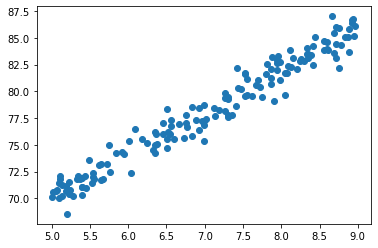

In [126]:
plt.scatter(X_train, y_train)

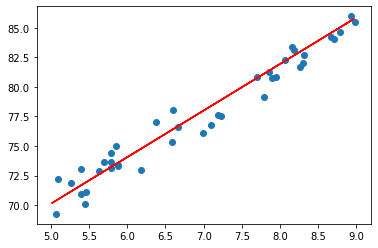

In [130]:
plt.scatter(X_test,y_test)
plt.plot(X_train, lr.predict(X_train), color ="r")

# Present your solution 

## Save ML Model 

In [131]:
import joblib
joblib.dump(lr, "Students_mark_predictor_model.pkl")

['Students_mark_predictor_model.pkl']

In [132]:
model = joblib.load("Students_mark_predictor_model.pkl")

In [138]:
model.predict([[5]])[0]

70.12594512018406

In [ ]:
model.